

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## PGE 383 Graduate Student Project Template 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


## Boosting models compared for classification

#### Santiago Callerio
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Lei Liu, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/misaelmmorales/)


### Executive Summary

* What is the gap, problem, opportunity, scientific question?

    This report provides a concise overview and comparative analysis of two prominent boosting algorithms: AdaBoost and XGBoost. Boosting algorithms are widely employed in machine learning for enhancing the performance of weak learners and improving predictive accuracy.

    AdaBoost, short for Adaptive Boosting, is a classic boosting algorithm that sequentially combines the output of weak learners to create a strong learner. It assigns higher weights to misclassified instances, allowing subsequent learners to focus on those cases and refine the overall model.

    XGBoost, or eXtreme Gradient Boosting, represents a more advanced and scalable boosting algorithm. It introduces regularization techniques, parallel processing, and a gradient boosting framework, contributing to improved model performance and efficiency. XGBoost has gained popularity for its ability to handle large datasets and its feature selection capabilities.

    In comparing the performance of AdaBoost and XGBoost, several key factors were considered, including predictive accuracy, training time, and the ability to handle complex relationships within the data. Experimental results demonstrate that XGBoost often outperforms AdaBoost in terms of predictive accuracy, especially when dealing with large and intricate datasets. The regularization techniques in XGBoost contribute to better generalization, reducing overfitting and improving the model's robustness.

    Additionally, XGBoost's efficient implementation, parallel processing capabilities, and optimization for both classification and regression tasks contribute to faster training times compared to AdaBoost. This is particularly advantageous in scenarios where computational resources are limited, or timely model deployment is crucial.

    In conclusion, the comparative analysis suggests that XGBoost indeed represents a performance improvement over AdaBoost in various aspects. Its enhanced predictive accuracy, scalability, and efficiency make it a preferred choice in many machine learning applications. However, the selection of the most suitable algorithm should still be context-dependent, considering factors such as dataset size, computational resources, and specific modeling requirements.

### 1 - Import Packages

In [211]:
# Install XGBoost library
# !pip install xgboost
# Install tqdm to time progress
#!pip install tqdm

We first import the basic libraries for data manipulation and plotting.

In [202]:
import numpy as np
import pandas as pd
import matplotlib # for plotting purposes
import matplotlib.pyplot as plt # for plotting purposes
import seaborn as sns # for plotting purposes

# Plot style configuration
import matplotlib.style as style # for plotting purposes
style.use('tableau-colorblind10') # set plotting style
#style.use('seaborn-notebook')
# style.use('seaborn-whitegrid')

matplotlib.rcParams['pdf.fonttype'] = 42 # set plotting style
matplotlib.rcParams['ps.fonttype'] = 42 # set plotting style
matplotlib.rcParams['font.family'] = 'Arial' # set plotting style
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] # for plotting purposes, using color palette

# From Professor Michael Pyrcz notebooks
import warnings                                       # supress any warnings for this demonstration
warnings.filterwarnings('default') 

We then import the weak learner (scikit-learn's DecisionTreeClassifier) used for boosting, and the first boosting ensemble model (scikit-learn's AdaBoostClassifier).

In [3]:
from sklearn.tree import DecisionTreeClassifier # Scikit learn Decision Tree Classifier Model
from sklearn.ensemble import AdaBoostClassifier # Ada Boost Ensemble Model

We also import the second boosting ensemble model (XGBoost's XGBClassifier).

In [4]:
# Code block for XGBoost model
from xgboost import XGBClassifier # XGBoost Classification model

We also import scikit tools for model training (train_test_split), to evaluate cross-validation results, and for categorical features transformation.

In [360]:
# Code block for scikit-learn models
from sklearn.model_selection import train_test_split # for training/test split
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.model_selection import cross_validate # for cross validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

import sklearn.metrics as metrics # For model evaluation
from sklearn.model_selection import learning_curve # cross-validated training and test scores

from sklearn.preprocessing import OneHotEncoder # for categorical features transformation

We also import scikit-learn's KNN imputer, used for missing valeus imputation.

In [54]:
from sklearn.impute import KNNImputer     # k-nearest neighbour imputation method

Last, we import a utility library to time the execution of the code, to measure the training performance of both algorithms

In [210]:
from tqdm.notebook import trange, tqdm
import time

### 2 - Functions

The following functions will be used in the workflow.

In [375]:
def load_csv_data(foldername, filename):
    '''
    Load csv data and return pandas dataframe
    '''
    filepath = '/'.join([foldername, filename])
    csv_data = pd.read_csv(filepath)
    return csv_data

def plot_missing_data_bars(df, ymin, ymax):
     # function from Professor Michael Pyrcz,https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Feature_Imputation.ipynb
    '''
    Plot barplot with summarized missing data (NaNs) per feature column
    '''
    ((df.isnull().sum()/len(df))*100).plot(kind = 'bar')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.2, hspace=0.2) # plot formatting
    plt.xlabel('Feature'); plt.ylabel('Percentage of Missing Records (%)'); plt.title('Data Completeness')
    plt.ylim([ymin,ymax])
#     plt.savefig('data_completeness.svg', bbox_inches = 'tight')
    plt.show()
    return

def plot_missing_data_heatmap(df):
    '''
    Plot heatmap showing missing data (NaNs)
    '''
    plt.title('Missing Values Heatmap')
    cmap=sns.color_palette("light:r", as_cmap=True)
    ax = sns.heatmap(df.isna(),cbar=False,cmap=cmap, yticklabels=False)
    #     plt.savefig('data_completeness_heatmap.svg', bbox_inches = 'tight')
    ax.tick_params(left=False)
    ax.set_xlabel('Features', fontsize=12)
    plt.show()
    return

def opt_tree_depth(clf, min_depth, max_depth):
    '''
    Optimize tree depth using regular Train/Test split
    '''
    learning_rate = 1.0
    n_estimators_max = 10
    test_acc = []
    train_acc = []
    for max_depth_i in trange(min_depth,max_depth,1):
        if clf=='ada':
            base_tree = DecisionTreeClassifier(max_depth=max_depth_i)
            model_clf = AdaBoostClassifier(base_estimator=base_tree,
                                           learning_rate=learning_rate,
                                           n_estimators=n_estimators_max)
        elif clf=='xgb':
            model_clf = XGBClassifier(learning_rate=learning_rate,
                                      n_estimators=n_estimators_max,
                                      max_depth=max_depth_i)
        model_clf.fit(X_train, y_train)
        y_train_pred = model_clf.predict(X_train)
        y_test_pred = model_clf.predict(X_test)
        test_acc.append(metrics.accuracy_score(y_test,y_test_pred))
        train_acc.append(metrics.accuracy_score(y_train,y_train_pred))
    return test_acc, train_acc

def opt_tree_depth_CV(clf, min_depth, max_depth, X, y):
    '''
    Optimize Tree Depth using Cross-Validation
    '''
    from sklearn.model_selection import cross_validate
    learning_rate = 1.0
    n_estimators_max = 10
    test_acc = []
    train_acc = []
    for max_depth_i in trange(min_depth,max_depth,1):
        if clf=='ada':
            base_tree = DecisionTreeClassifier(max_depth=max_depth_i)
            model_clf = AdaBoostClassifier(base_estimator=base_tree,
                                           learning_rate=learning_rate,
                                           n_estimators=n_estimators_max)
        elif clf=='xgb':
            model_clf = XGBClassifier(learning_rate=learning_rate,
                                      n_estimators=n_estimators_max,
                                      max_depth=max_depth_i)
        scores = cross_validate(model_clf, X, y, scoring='accuracy',
                                cv=5, return_train_score=True)
        test_acc.append(scores['test_score'].mean())
        train_acc.append(scores['train_score'].mean())
    return test_acc, train_acc

def opt_estimators_CV(clf, min_estimators, max_estimators, step, X, y, max_depth = 4):
    '''
    Optimize Tree Depth using Cross-Validation
    '''
    from sklearn.model_selection import cross_validate
    max_depth = max_depth
    learning_rate = 1.0
#     n_estimators_max = 10
    test_acc = []
    train_acc = []
    for n_estimators_i in trange(min_estimators,max_estimators,step):
        if clf=='ada':
            base_tree = DecisionTreeClassifier(max_depth=max_depth)
            model_clf = AdaBoostClassifier(base_estimator=base_tree,
                                           learning_rate=learning_rate,
                                           n_estimators=n_estimators_i)
        elif clf=='xgb':
            model_clf = XGBClassifier(learning_rate=learning_rate,
                                      n_estimators=n_estimators_i,
                                      max_depth=max_depth)
        scores = cross_validate(model_clf, X, y, scoring='accuracy',
                                cv=5, return_train_score=True)
        test_acc.append(scores['test_score'].mean())
        train_acc.append(scores['train_score'].mean())
    return test_acc, train_acc

def opt_LR_CV(clf, min_LR, max_LR, step, X, y, max_depth = 4, n_estimators = 30):
    '''
    Optimize Tree Depth using Cross-Validation
    '''
    from sklearn.model_selection import cross_validate
    max_depth = max_depth
#     learning_rate = 1.0
    n_estimators_max = n_estimators
    test_acc = []
    train_acc = []
    for LR_i in trange(min_LR,max_LR,step):
        LR_i = LR_i/10
        if clf=='ada':
            base_tree = DecisionTreeClassifier(max_depth=max_depth)
            model_clf = AdaBoostClassifier(base_estimator=base_tree,
                                           learning_rate=LR_i,
                                           n_estimators=n_estimators_max)
        elif clf=='xgb':
            model_clf = XGBClassifier(learning_rate=LR_i,
                                      n_estimators=n_estimators_max,
                                      max_depth=max_depth)
        scores = cross_validate(model_clf, X, y, scoring='accuracy',
                                cv=5, return_train_score=True)
        test_acc.append(scores['test_score'].mean())
        train_acc.append(scores['train_score'].mean())
    return test_acc, train_acc

def Random_Search_Optimization(clf, X, y):
    '''
    Perform Random Optimization with Cross-Validation
    '''
    if clf=='ada':
#         base_tree = DecisionTreeClassifier(max_depth=max_depth)
        model_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
        # Search Parameters
        parameters = {
            "base_estimator__max_depth": np.arange(2,10,1),
            "learning_rate" : np.arange(1,20,1)/10,
            "n_estimators": np.arange(1,40,5)
        }
    elif clf=='xgb':
        model_clf = XGBClassifier()
        # Search Parameters
        parameters = {
            "max_depth": np.arange(2,10,1),
            "learning_rate" : np.arange(1,20,1)/10,
            "n_estimators": np.arange(1,40,5)
        }
    # Perform Random Search
    random = RandomizedSearchCV(model_clf,
                                parameters,
                                n_jobs=-1,
                                cv=5,
                                scoring='accuracy')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    random.fit(X_train, y_train)
    best_score = random.best_score_ # best model score
    best_parameters = random.best_params_ # best model parameters
    return random, best_score, best_parameters

### 3 - Load Data

The analysis is performed on a dataset from [Kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data), which contains about 10 years of daily weather observations from many locations across Australia.

The features are:
* **Date** - Observation date
* **Location** - Observation location
* **MinTemp** - The minimum temperature at the observation date and location, in degrees celsius
* **MaxTemp** - The maximum temperature at the observation date and location, in degrees celsius
* **Rainfall** - The amount of rainfall recorded for the day in mm
* **Evaporation** - The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* **Sunshine** - The number of hours of bright sunshine in the day.
* **WindGustDir** - The direction of the strongest wind gust in the 24 hours to midnight
* **WindGustSpeed** - The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* **WindDir9am** - Direction of the wind at 9am
* **WindDir3pm** - Direction of the wind at 3pm
* **WindSpeed9am** - Wind speed (km/hr) averaged over 10 minutes prior to 9am
* **WindSpeed3pm** - Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* **Humidity9am** - Humidity (percent) at 9am
* **Humidity3pm** - Humidity (percent) at 3pm
* **Pressure9am** - Atmospheric pressure (hpa) reduced to mean sea level at 9am
* **Pressure3pm** - Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* **Cloud9am** - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths.
* **Cloud3pm** - Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", which are a unit of eigths.
* **Temp9am** - Temperature (degrees C) at 9am
* **Temp3pm** - Temperature (degrees C) at 3pm
* **RainToday** - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

Response feature:
* **RainTomorrow** - The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

The code below loads the dataset directly from my personal [GitHub](https://github.com/SCallerio).

In [163]:
# Load Australia Weather Dataset
foldername = r'https://raw.githubusercontent.com/SCallerio/data_SSML/master' # define the folder path
filename = 'weatherAUS.csv' # define the file name in folder path
data_df = load_csv_data(foldername, filename) # load csv data into a Pandas dataframe

data_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

We check the dataset size, to understand the volume of data available.

In [119]:
print(f'Dataset rows (number of data points): {data_df.shape[0]}')
print(f'Dataset columns (number of features plus response feature): {data_df.shape[1]}')

Dataset rows (number of data points): 145460
Dataset columns (number of features plus response feature): 23


### 4 - Data Visualization and Exploration

#### 4-1 - Data Completeness
First the amount of missing values per feature is displayed, to understand which features are useful and where is data imputation required.

The percentage of missing records (NaNs) is diesplayed below, for each of the feature columns.

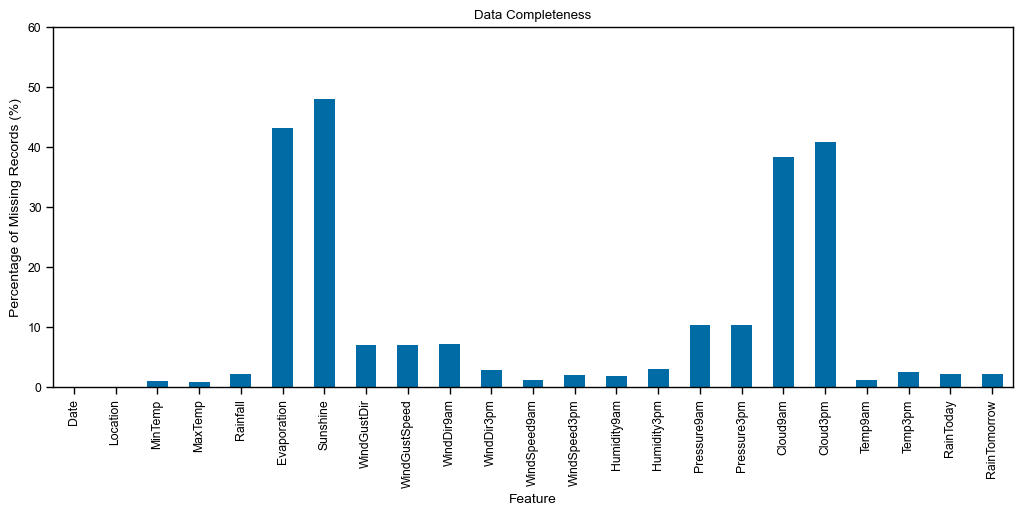

In [120]:
plt.figure(figsize=(3,3))
plot_missing_data_bars(data_df, 0, 60)

From here it is observed that the following features present more than 20% of its records missing:
* Evaporation
* Sunshine
* Cloud9am
* Cloud3pm

These features are eliminated, since they are not useful for feature imputation neither.

We also plot a heatmap to understand where each of this missing records are.

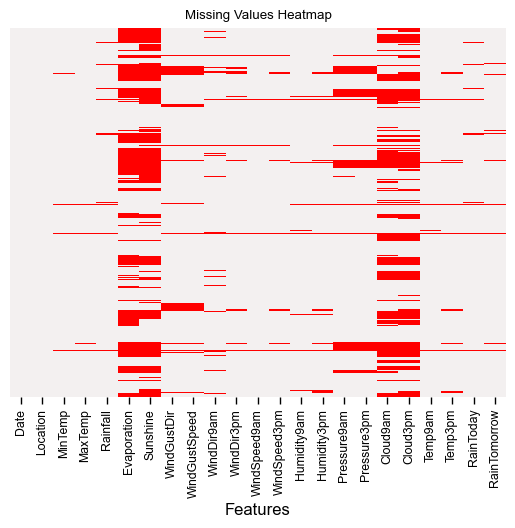

In [121]:
plot_missing_data_heatmap(data_df)

Here we can observe that the missing values are dispersed along the complete dataset, so the imputation of them is not possible, and the elimination of those rows can remove a good part of the dataset.

Next we drop those features from the dataset.

In [164]:
data_df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], inplace=True) # drop columns 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'

#### 4-2 - Data Visualization
Next, we visualize the crossplot of every feature where the groups correspond to Trua and False for the response feature rain tomorrow.

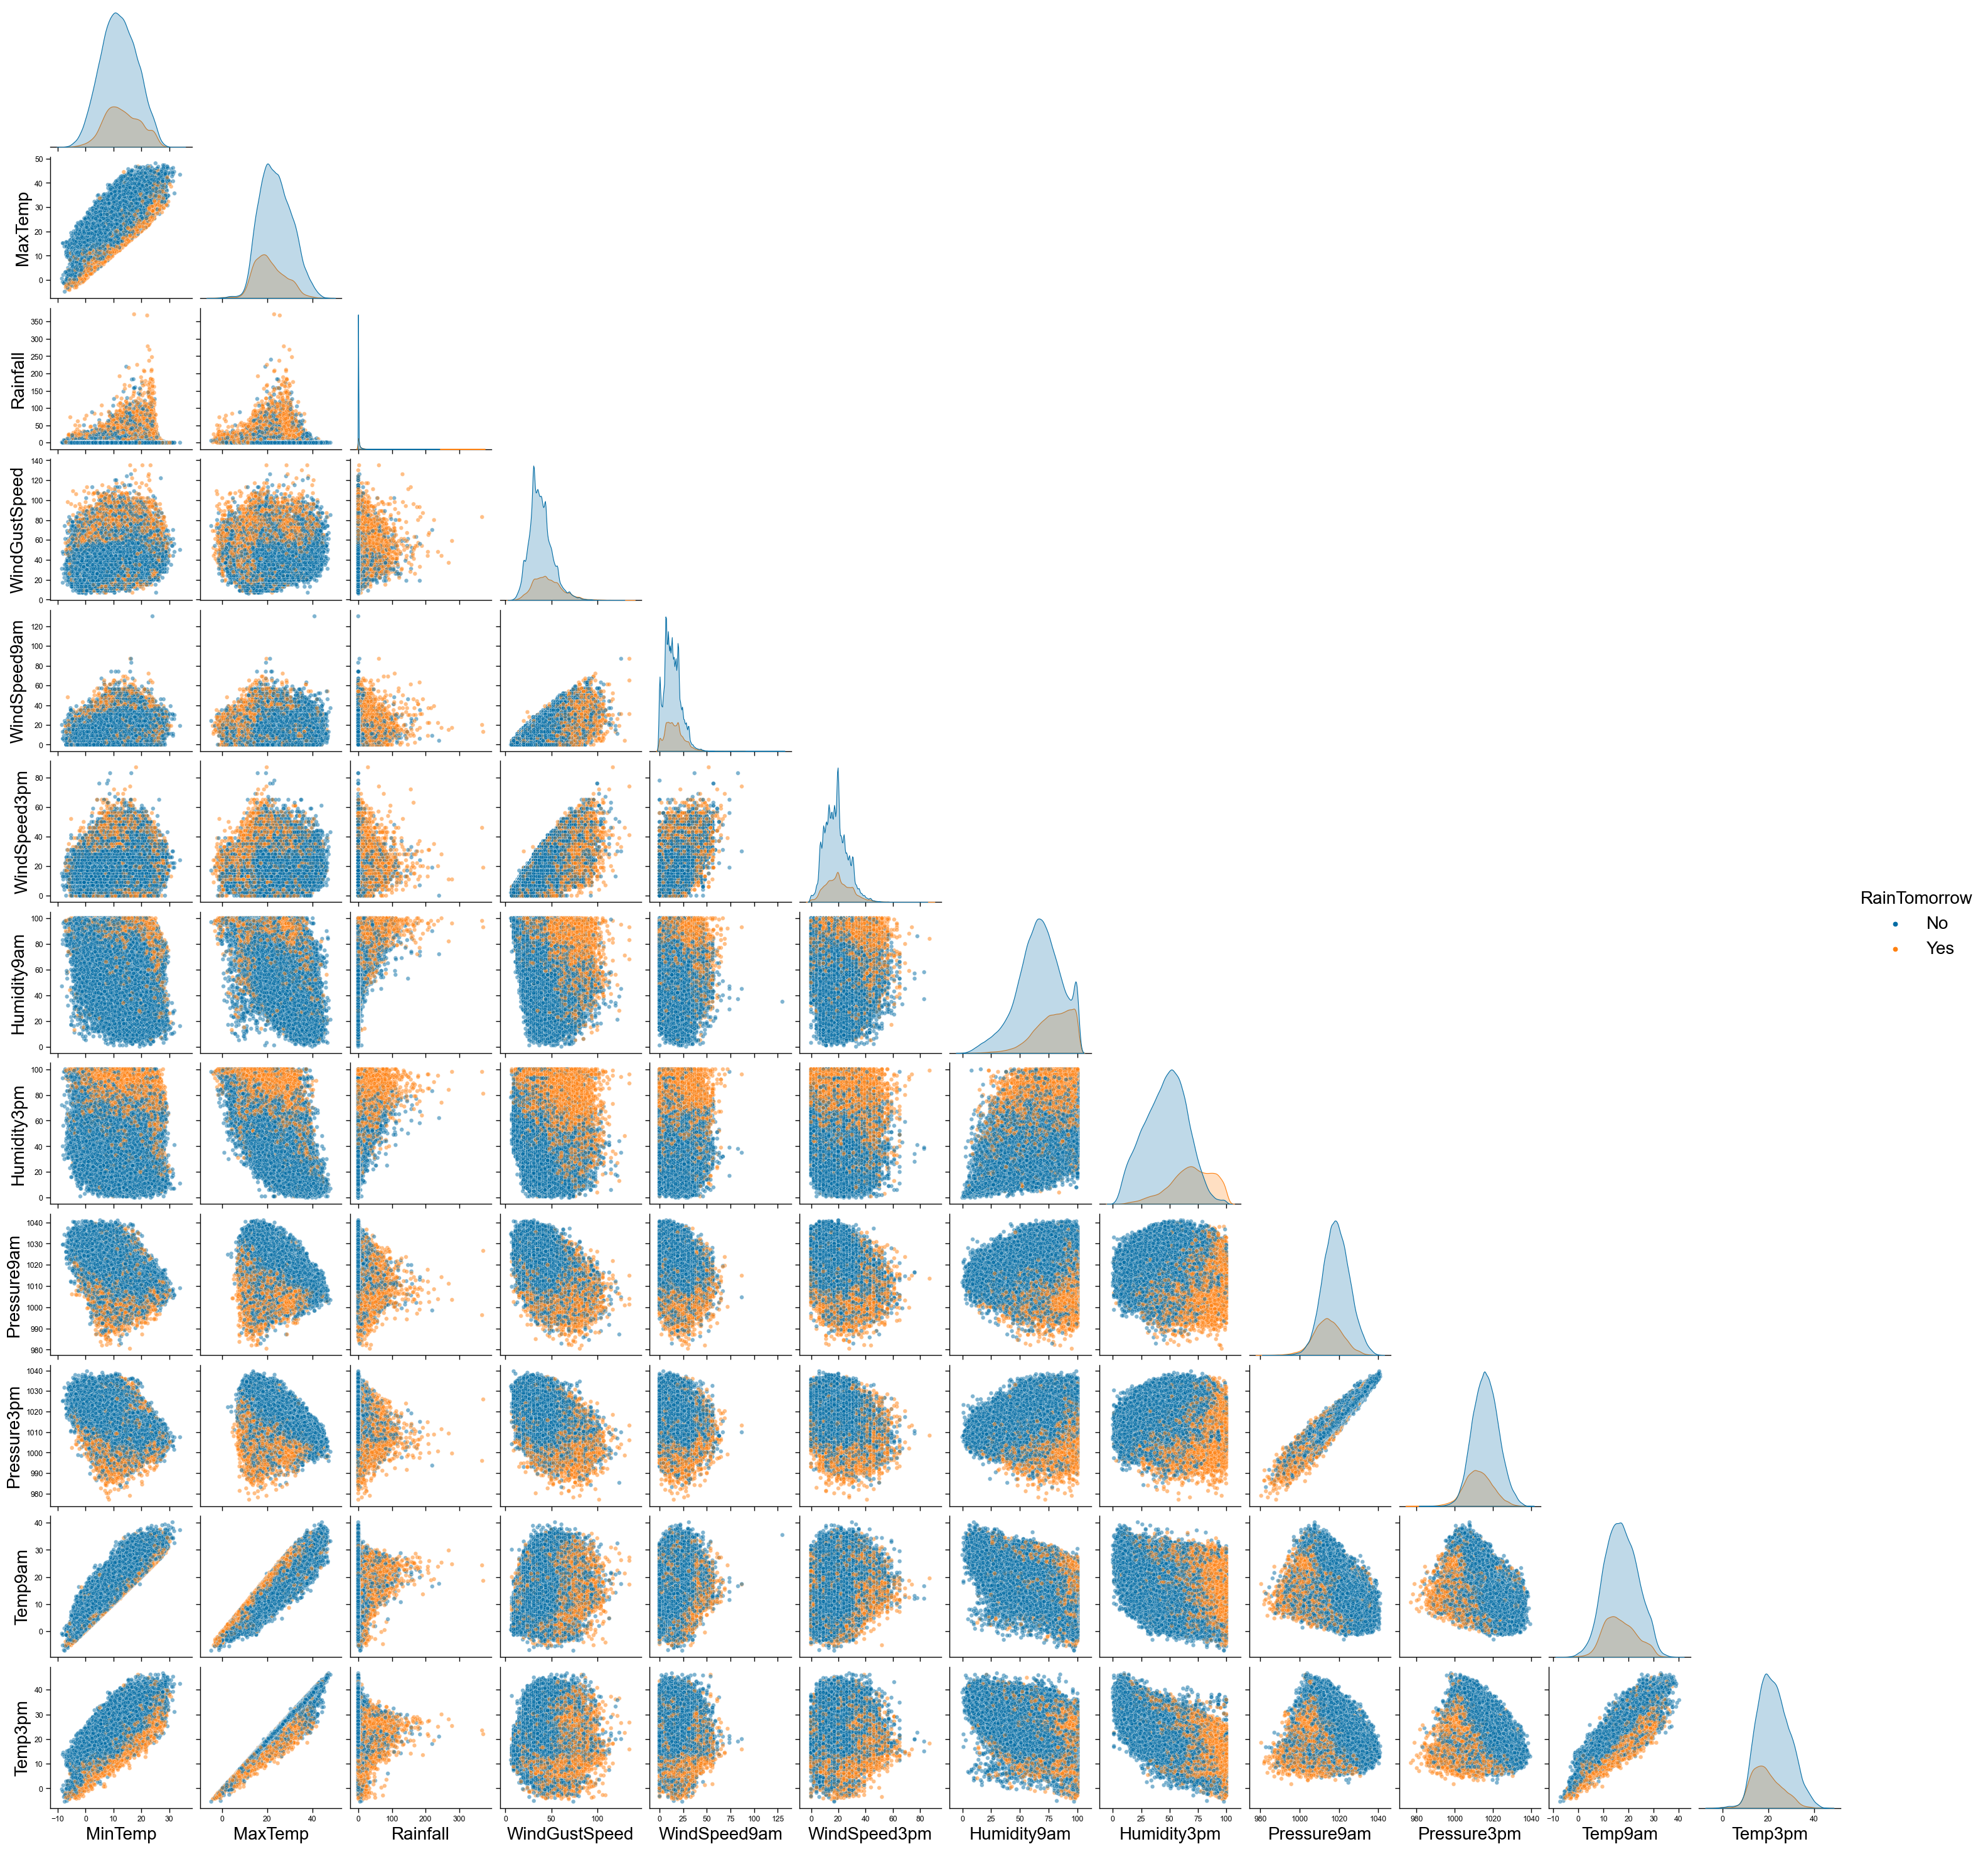

In [123]:
# Visualize a pairplot of the main features
sns.set_context("paper", rc={"axes.labelsize":20, "legend.fontsize":20, "legend.title_fontsize":20})
sns.pairplot(data_df,hue='RainTomorrow', corner=True, plot_kws=dict(alpha=0.5))
# plt.grid(False)
plt.show()

Here we can observe:
* There is no clear distinction between values for positive or negative RainTomorrow, meaning the distributions overlap and there are no clear indications of which values dictate whether it rais or not
* Temp3pm and Temp9am are highly correlated, as well as both values with MaxTemp
* Pressure3pm and Pressure9am are also highly correlated features
* Rainfall presents higher values for the positive RainTomorrow values
* RainTomorrow also seems to be concentrated on the high values for Humidity3pm

Next, every parameter distribution is plotted.

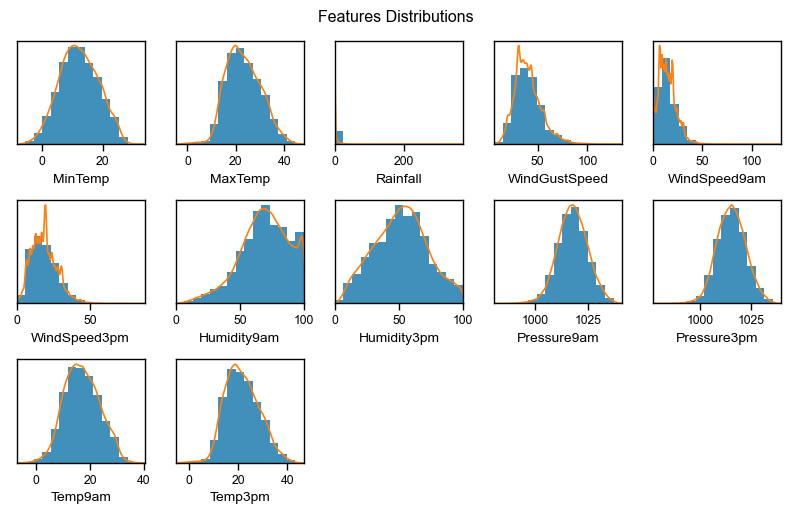

In [124]:
sns.set_context("paper", rc={"axes.labelsize":10, "legend.fontsize":10, "legend.title_fontsize":10}) # Set parameters for font and title size
columns = data_df.select_dtypes(include=['float64']).columns # Select only numerical columns
plt.figure(figsize=(8,8*.8)) # set figure size
plt.suptitle('Features Distributions') # set general title
for i,col in enumerate(columns): # iterate thorugh columns, plotting each histogram and kde
    x = data_df[col]
    i+=1
    plt.subplot(4,5,i) # select subplot
    plt.hist(x, bins=15, density=True, align='mid', alpha=0.75) # plot histogram
    sns.kdeplot(x) # plot kde distribution
    plt.ylabel('')
    plt.yticks([])
    plt.xlim(x.min(),x.max())
    
plt.tight_layout()
plt.show()

It is observed that:
* Most features present a normal distribution
* Features Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm present outliers 

The highly correlated features are also dropped. Based on this, we drop:
* Temp9am
* Temp3pm
* Pressure9am

In [165]:
drop_cols = ['Pressure9am','Temp9am', 'Temp3pm']
data_df.drop(columns=drop_cols, inplace=True)

#### 4-3 - Response Feature
We also analyze the response feature, to understand the samples balance. For that we plot the count of records per each class.

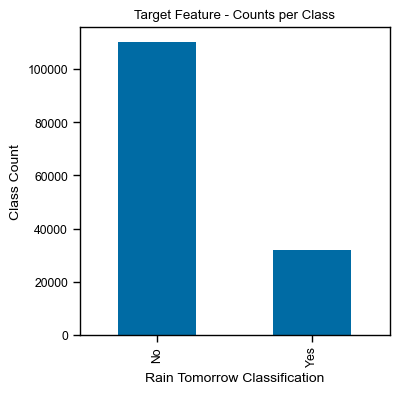

In [125]:
plt.figure(figsize=(4,4))
plt.title('Target Feature - Counts per Class')
data_df['RainTomorrow'].value_counts().plot(kind='bar') # barplot with record count per class
plt.xlabel('Rain Tomorrow Classification')
plt.ylabel('Class Count')
plt.show()

As observed in the previous barplot, the target feature is highly imbalanced, with most of the samples falling into the 'No' classification.

#### 4-4 - Categorical Features
Finally, we analyze the categorical features included in the dataset.

In [166]:
# Print Categorical Columns
cat_cols = data_df.select_dtypes(include=['object']).columns.values # Select categorical columns
print('Categorical Columns:')
print(*(x for x in cat_cols), sep='\n')

Categorical Columns:
Date
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


There are 7 categorical columns, including the response feature. We also check the number of classes included on each categorical column, to understand the transformation and feature augmentation required to include these in the predictor features.

In [135]:
print(f'Number of classes in Location feature: {data_df.Location.unique().shape[0]}')
print(f'Number of classes in WindGustDir feature: {data_df.WindGustDir.unique().shape[0]}')
print(f'Number of classes in WindDir9am feature: {data_df.WindDir9am.unique().shape[0]}')
print(f'Number of classes in WindDir3pm feature: {data_df.WindDir3pm.unique().shape[0]}')

Number of classes in Location feature: 49
Number of classes in WindGustDir feature: 17
Number of classes in WindDir9am feature: 17
Number of classes in WindDir3pm feature: 17


We compute the total number of additional features requried to represent each of the classes in the categorical features.

In [136]:
sum_classes = data_df.Location.unique().shape[0] + data_df.WindGustDir.unique().shape[0] + data_df.WindDir9am.unique().shape[0] + data_df.WindDir3pm.unique().shape[0]
print(f'Total of additional features required: {sum_classes}')

Total of additional features required: 100


These results represent that, since one-hot encoding is required for considering these features in the predictor features, our feature space would be enlarged from 19 columns (after dropping the high NaNs ones) to 119 features.

Given this condition, we will initially ignore the Location and Wind categorical features. Including them in the analysis will be evaluated depending on the performance results.

These categorical features aredropped from the dataset, except for RainToday.

In [167]:
data_df.drop(columns=cat_cols[:-2], inplace=True) # Drop categorical columns

### 5 - Data Preparation

#### 5.1 - Categorical values imputation

We impute values to the categorical values, to be able to impute the missing values in those columns too.

In [168]:
data_df['RainToday'] = data_df['RainToday'].map({'Yes':1,'No':0})
data_df['RainTomorrow'] = data_df['RainTomorrow'].map({'Yes':1,'No':0})

#### 5.2 - Feature Imputation

KNN feature imputation is applied to the missing values, to fill the missing values based on the nearest neighbours values. This has demonstrated to be an effective technique for feature imputation, based on the k-neares neighbours algorithm.

We first add a column to identify rows with imputed values.

In [169]:
# from Professor Michael Pyrcz,https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Feature_Imputation.ipynb
data_df['Imputed']=(data_df.isnull().sum(axis=1)) > 0

We now create a separate dataframe with the imputed values, and impute the new values using the KNN Imputer.

In [185]:
# from Professor Michael Pyrcz,https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Feature_Imputation.ipynb
df_knn = data_df.copy(deep=True)                         # make a deep copy of the DataFrame
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_knn.iloc[:,:] = knn_imputer.fit_transform(df_knn)

We now plot the resulting distributions, and compare the imputed distributions and the original ones.

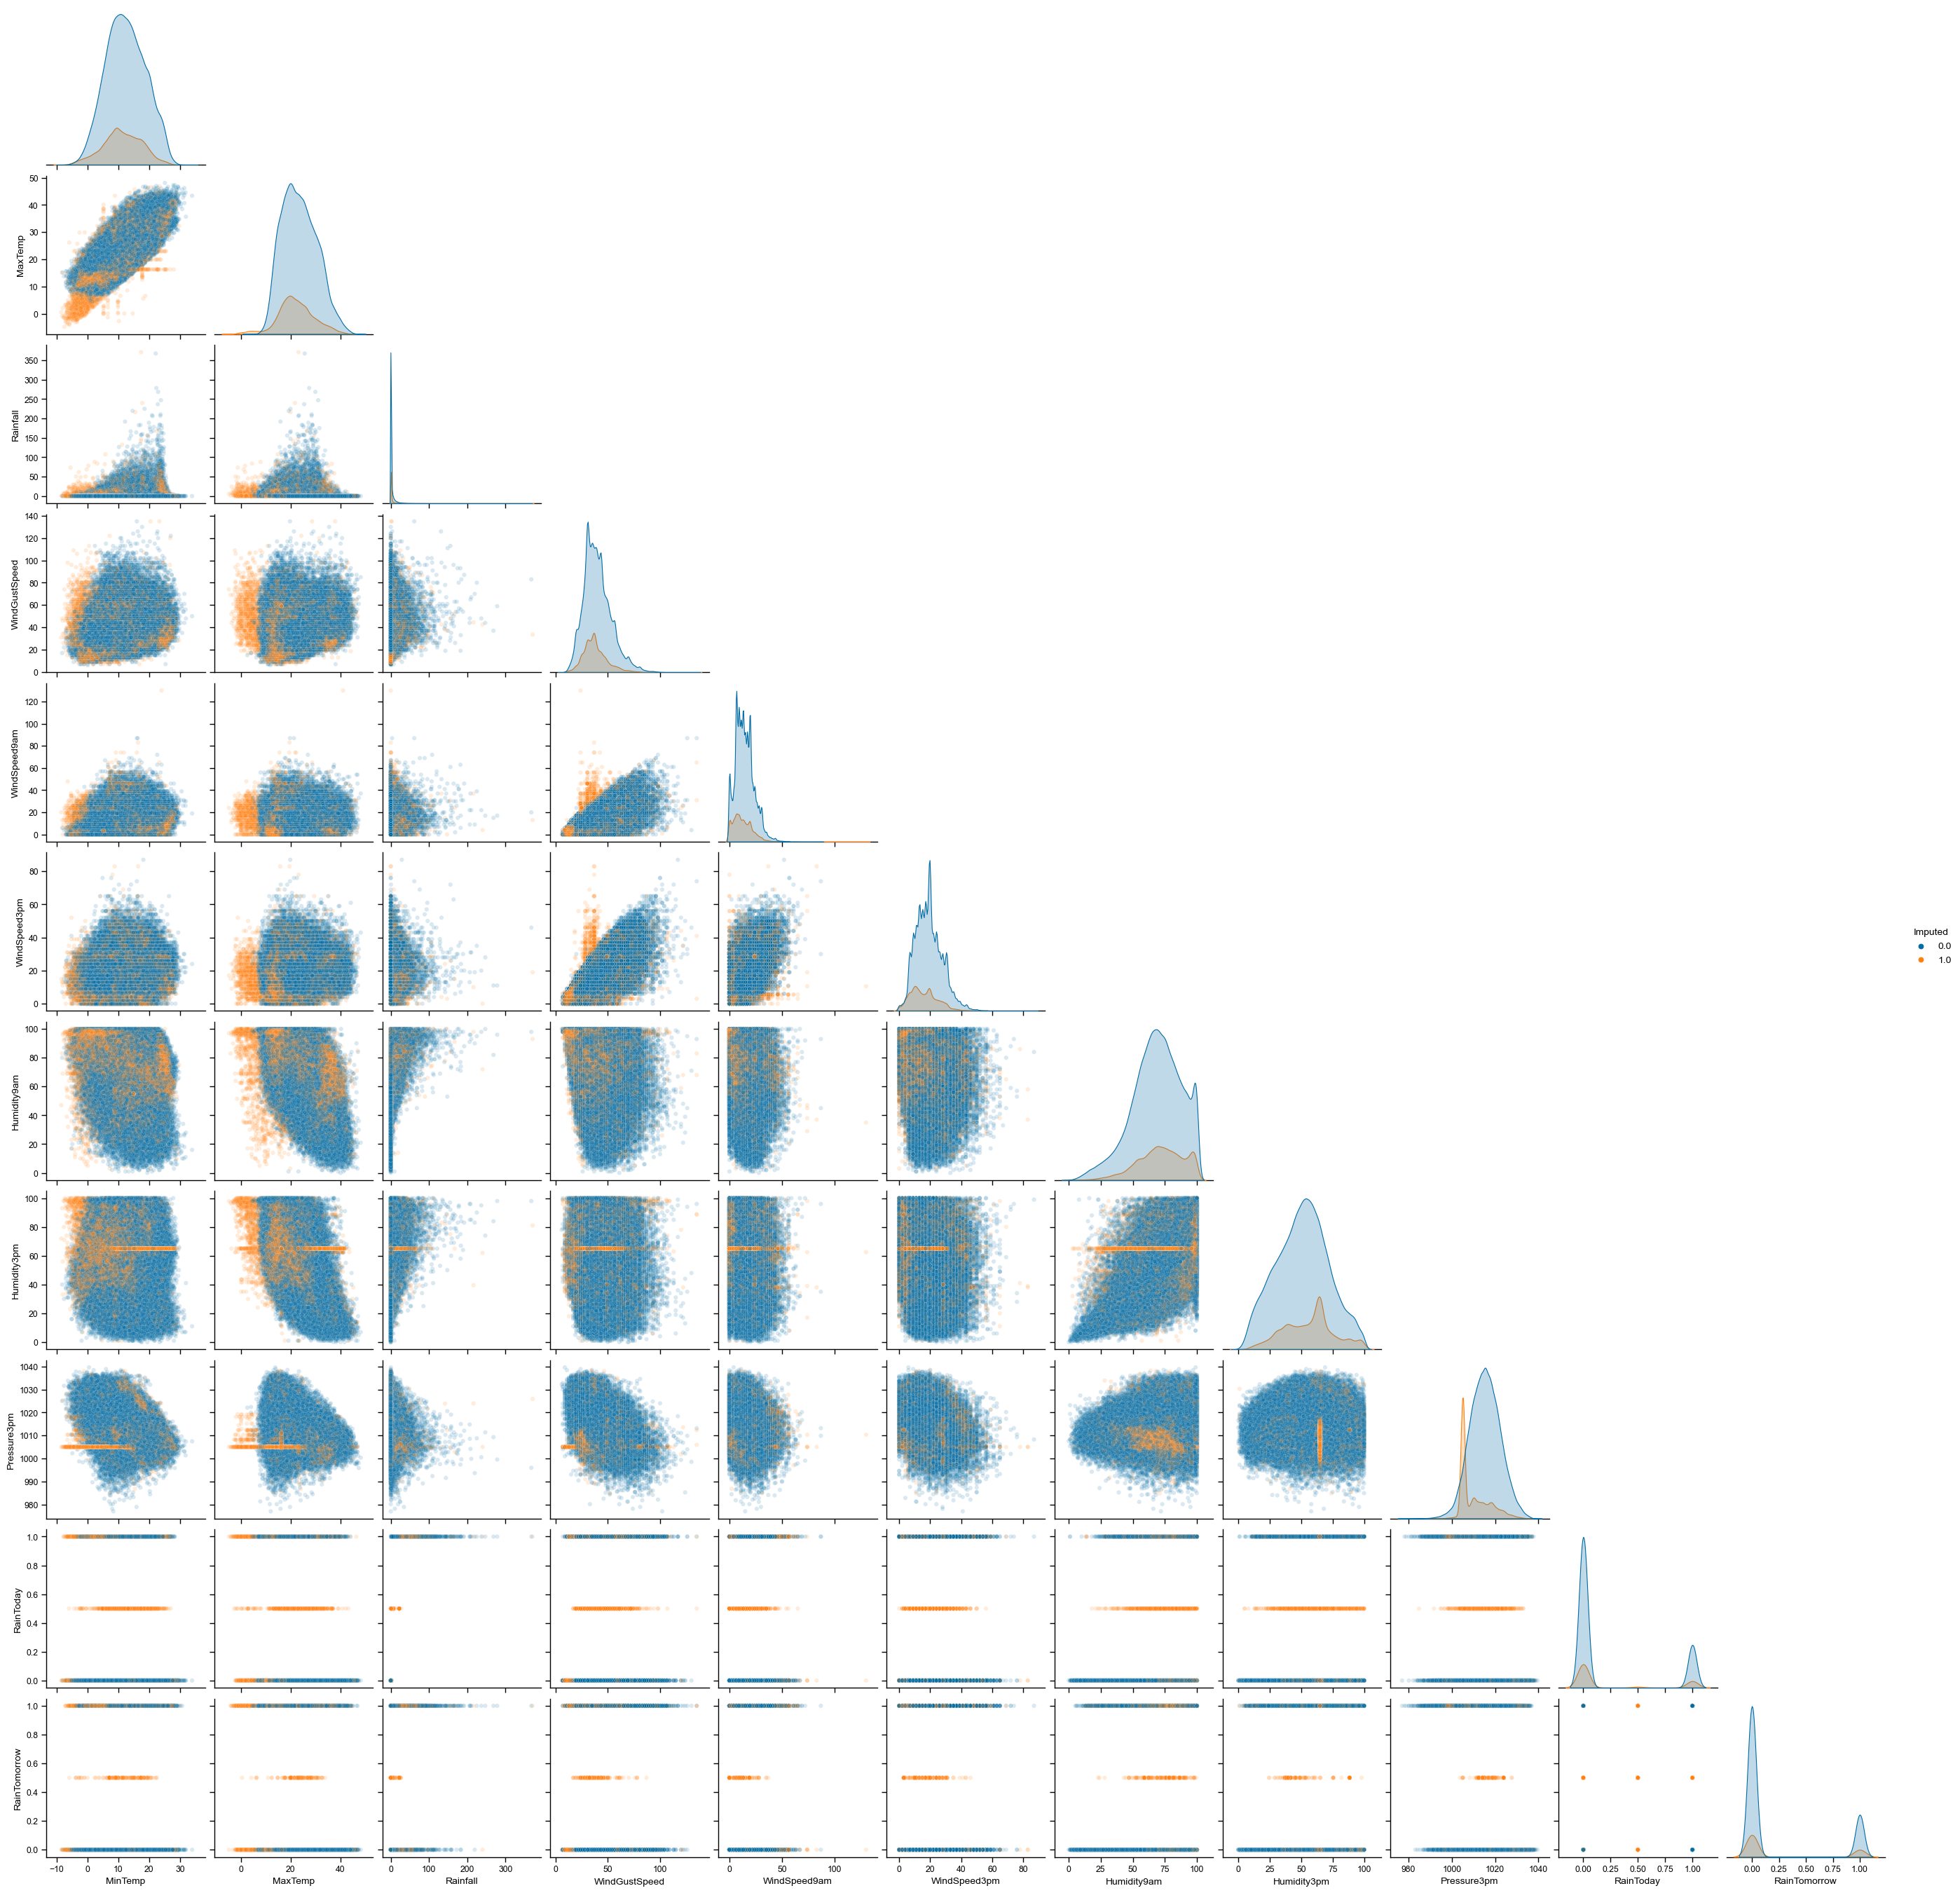

In [172]:
sns.pairplot(df_knn.iloc[:,:], hue="Imputed", plot_kws={'alpha':0.15,'s':20}, corner=True)
# plt.subplots_adjust(left=0.0, bottom=0.0, right=0.5, top=0.6, wspace=0.1, hspace=0.2)

It is observed that the imputed distributions are quite similar to the original ones, except for the pressure results.
Thus, these results are used to train and validate the models.

### 6 - Models Training and Hyperparameter Optimization

#### 6-1 - Hyperparameter Selection

First we take a look on each of the models hyperparameters, to select those that are common among them. The first guess is to use the estimator number (n_estimators), learning rate (learning_rate), and base estimator maximum depth (max_depth). The boosting approach is to use weack learners, so intuitively the tree max. depth should be set low.

We first instantiate an AdaBooster Classifier, and look at the available parameters.

In [175]:
base_tree = DecisionTreeClassifier(max_depth=5)
ada_clf = AdaBoostClassifier(base_estimator=base_tree)
ada_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 5,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(max_depth=5),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

We do the same for the XGBooster Classifier.

In [176]:
xgb_clf = XGBClassifier()
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

Based on the available parameters, for hyperparameters optimization and performance comparison the following parameters are used:
* Learning Rate
* Estimators number

#### 6-2 - Hyperparameter Optimization with Cross-validation

K-fold cross-validation will be used to train the models, using a 5 k-fold.

We first divide the data into X (input features) and y (response feature), where input features are:

* **MinTemp** - The minimum temperature at the observation date and location, in degrees celsius
* **MaxTemp** - The maximum temperature at the observation date and location, in degrees celsius
* **Rainfall** - The amount of rainfall recorded for the day in mm
* **WindGustSpeed** - The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* **WindSpeed9am** - Wind speed (km/hr) averaged over 10 minutes prior to 9am
* **WindSpeed3pm** - Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* **Humidity9am** - Humidity (percent) at 9am
* **Humidity3pm** - Humidity (percent) at 3pm
* **Pressure3pm** - Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* **RainToday** - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

In [187]:
# Drop Imputed Column
df_knn.drop(columns='Imputed', inplace=True)

In [251]:
# Split Input and Response features
X = df_knn.iloc[:,:-1] # input features 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am','WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm','RainToday'
y = df_knn.iloc[:,-1].astype(int) # response feature 'RainTomorrow'

##### 6.2.1 - Tree Depth

We first verify the optimal maximum depth, which based on the boosting logics, should be a low value. This ensures the weak learners needed to perform the boosting technique.

We perform optimization with cross-validation for an XGBoost Classifier, with tree depths between 2 to 25. We also measure the elapsed time of the optimization loop, to compare model performances. We set a learning rate = 1.0, 10 maximum estimators, and a 5-fold cross-validation using accuracy as metric.

In [284]:
min_depth = 2
max_depth = 25

clf = 'xgb'
st = time.time()
test_acc_xgb, train_acc_xgb = opt_tree_depth_CV(clf, min_depth, max_depth, X, y)
elapsed_time = time.time() - st
print('XGB Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

  0%|          | 0/23 [00:00<?, ?it/s]

XGB Execution time: 00:01:20


We now perform the same optimization, using cross-validation, for the AdaBooster.

In [286]:
clf = 'ada'
st = time.time()
test_acc_ada, train_acc_ada = opt_tree_depth_CV(clf, min_depth, max_depth, X, y)
elapsed_time = time.time() - st
print('AdaBoost Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

  0%|          | 0/23 [00:00<?, ?it/s]

AdaBoost Execution time: 00:08:49


We observe that the execution time for the XGBoost is substantially lower than for the ADA, around 8 times lower. When the time required for each iteration is compared, XGB is 3 times faster (9 seconds/it vs. 33 seconds/it for the ADA). 

We now plot the results for both models.

[]

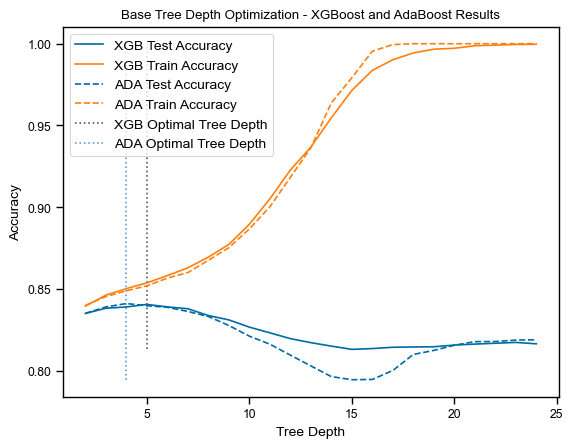

In [300]:
plt.title('Base Tree Depth Optimization - XGBoost and AdaBoost Results')
# Plot XGB results
plt.plot(range(min_depth,max_depth,1), test_acc_xgb, 
         label='XGB Test Accuracy', color = colors[0])
plt.plot(range(min_depth,max_depth,1), train_acc_xgb, 
         label='XGB Train Accuracy', color = colors[1])
plt.vlines(range(min_depth,max_depth,1)[np.argmax(test_acc_xgb)], 
           np.array(test_acc_xgb).min(), 
           np.array(train_acc_xgb).max(),
           linestyle='dotted', label = 'XGB Optimal Tree Depth', color = colors[3])

# Plot ADA results
plt.plot(range(min_depth,max_depth,1), test_acc_ada, 
         label='ADA Test Accuracy', color = colors[0], linestyle='dashed')
plt.plot(range(min_depth,max_depth,1), train_acc_ada, 
         label='ADA Train Accuracy', color = colors[1], linestyle='dashed')
plt.vlines(range(min_depth,max_depth,1)[np.argmax(test_acc_ada)], 
           np.array(test_acc_ada).min(), 
           np.array(train_acc_ada).max(),
          linestyle='dotted', label = 'ADA Optimal Tree Depth', color = colors[4])

plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

Here we observe that the optimal depths for the XGB algorithm is of 5, and for the ADA is 4 (both constitute weak learners). Is is also observed that the performance in training and testing is quite similar for both models.

As tree depths increase, they tend to overfit.

##### 6.2.2 - Estimators number optimization

Using these depths as reference, we now plot the results for n_estimators optimization. 

We first perform these evaluation using the XGBoost estimator, with a base tree of depth = 4, a learning rate = 1.0, and a 5-fold cross-validation using accuracy as metric.

Minimum estimators is set as 5, maximum estimators is set as 100.

In [357]:
min_estimators = 5
max_estimators = 100
step = 5

clf = 'xgb'
st = time.time()
test_acc_xgb, train_acc_xgb = opt_estimators_CV(clf, min_estimators, max_estimators, step, X, y, max_depth = 4)
elapsed_time = time.time() - st
print('XGB Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

  0%|          | 0/19 [00:00<?, ?it/s]

XGB Execution time: 00:00:17


We repeat the evaluation using the AdaBoosting estimator, with a base tree of depth = 4, a learning rate = 1.0, and a 5 k-fold cross-validation using accuracy as metric.

Minimum estimators is set as 5, maximum estimators is set as 100.

In [358]:
min_estimators = 5
max_estimators = 100
step = 5

clf = 'ada'
st = time.time()
test_acc_ada, train_acc_ada = opt_estimators_CV(clf, min_estimators, max_estimators, step, X, y, max_depth = 4)
elapsed_time = time.time() - st
print('ADA Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

  0%|          | 0/19 [00:00<?, ?it/s]

ADA Execution time: 00:15:41


We first observe that the XGBoost is again faster to perform, about 50 times faster (20 seconds vs. 15 minutes for AdaBoost). Comparing each iteration, XGBoost is about 50 times faster too (1.7 sec/it vs. 80 sec/it for AdaBoost). 

We now plot the results to find the optimal number of estimators.

[]

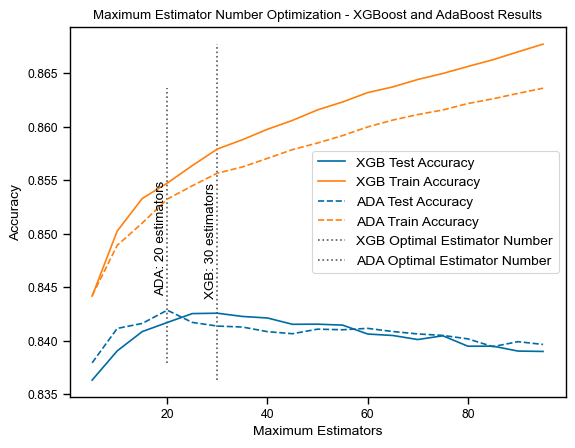

In [359]:
x = range(min_estimators,max_estimators,step)
plt.title('Maximum Estimator Number Optimization - XGBoost and AdaBoost Results')
# Plot XGB results
plt.plot(x, test_acc_xgb, 
         label='XGB Test Accuracy', color = colors[0])
plt.plot(x, train_acc_xgb, 
         label='XGB Train Accuracy', color = colors[1])
# Get estimators for maximum test score
estimators_max_test = range(min_estimators,max_estimators,step)[np.argmax(test_acc_xgb)]
plt.vlines(estimators_max_test, 
           np.array(test_acc_xgb).min(), 
           np.array(train_acc_xgb).max(),
           linestyle='dotted', label = 'XGB Optimal Estimator Number', color = colors[3])

plt.text(estimators_max_test, np.array(test_acc_xgb).max()*1.002, 'XGB: '+str(estimators_max_test) + ' estimators',
        rotation=90, horizontalalignment='right')

# Plot ADA results
plt.plot(x, test_acc_ada, 
         label='ADA Test Accuracy', color = colors[0], linestyle='dashed')
plt.plot(x, train_acc_ada, 
         label='ADA Train Accuracy', color = colors[1], linestyle='dashed')
# Get estimators for maximum test score
estimators_max_test = range(min_estimators,max_estimators,step)[np.argmax(test_acc_ada)]
plt.vlines(estimators_max_test, 
           np.array(test_acc_ada).min(), 
           np.array(train_acc_ada).max(),
           linestyle='dotted', label = 'ADA Optimal Estimator Number', color = colors[3])

plt.text(estimators_max_test, np.array(test_acc_ada).max()*1.002, 'ADA: '+str(estimators_max_test) + ' estimators',
        rotation=90, horizontalalignment='right')


plt.xlabel('Maximum Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

From the plot we observe that the max. test performance for XGB is given at 30 estimators, while for the ADA is of 20 estimators. After this there's a clear tendency for overfitting, with the testing accuracy beign reduced as the estimators number is increased.

We can observe that for the testing results, both models are quite similar, but for training XGBoost is consistently better than AdaBoost.

##### 6.2.2 - Learning rate optimization

Using the previous results for tree depths and estimators as reference, we now plot the results for the learning rate optimization. 

We first perform these evaluation using the XGBoost estimator, with a base tree of depth = 4, n_estimators = 30, and a 5-fold cross-validation using accuracy as metric.

Minimum learning rate is set as 1, maximum learning rate is set as 10.

In [343]:
min_LR = 1
max_LR = 20
step = 1

clf = 'xgb'
st = time.time()
test_acc_xgb, train_acc_xgb = opt_LR_CV(clf, min_LR, max_LR, step, X, y, max_depth = 4, n_estimators = 30)
elapsed_time = time.time() - st
print('XGB Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

  0%|          | 0/19 [00:00<?, ?it/s]

XGB Execution time: 00:00:16


We now repeat these evaluation using the AdaBoost estimator, with a base tree of depth = 4, n_estimators = 20, and a 5-fold cross-validation using accuracy as metric.

Minimum learning rate is set as 1, maximum learning rate is set as 10.

In [344]:
clf = 'ada'
st = time.time()
test_acc_ada, train_acc_ada = opt_LR_CV(clf, min_LR, max_LR, step, X, y, max_depth = 4, n_estimators = 20)
elapsed_time = time.time() - st
print('ADA Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

  0%|          | 0/19 [00:00<?, ?it/s]

ADA Execution time: 00:06:37


We observe again that XGBoost is consistenlty faster than AdaBoost.

We now plot the results.

[]

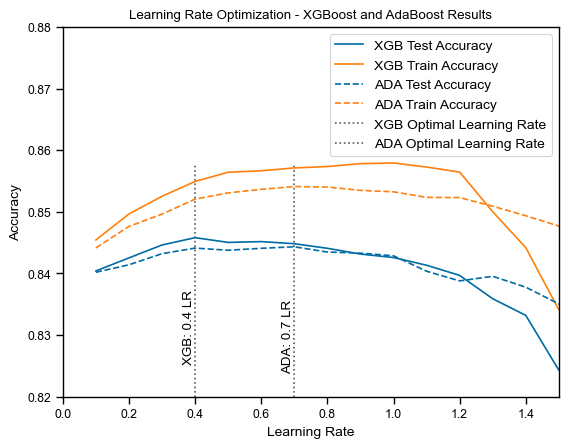

In [355]:
x = np.arange(min_LR,max_LR,step)/10
plt.title('Learning Rate Optimization - XGBoost and AdaBoost Results')
# Plot XGB results
plt.plot(x, test_acc_xgb, 
         label='XGB Test Accuracy', color = colors[0])
plt.plot(x, train_acc_xgb, 
         label='XGB Train Accuracy', color = colors[1])
# Get estimators for maximum test score
estimators_max_test = x[np.argmax(test_acc_xgb)]
plt.vlines(estimators_max_test, 
           np.array(test_acc_xgb).min(), 
           np.array(train_acc_xgb).max(),
           linestyle='dotted', label = 'XGB Optimal Learning Rate', color = colors[3])

plt.text(estimators_max_test, np.array(test_acc_xgb).max()*.99, 'XGB: '+str(estimators_max_test) + ' LR',
        rotation=90, horizontalalignment='right', verticalalignment='top')

# Plot ADA results
plt.plot(x, test_acc_ada, 
         label='ADA Test Accuracy', color = colors[0], linestyle='dashed')
plt.plot(x, train_acc_ada, 
         label='ADA Train Accuracy', color = colors[1], linestyle='dashed')
# Get estimators for maximum test score
estimators_max_test = x[np.argmax(test_acc_ada)]
plt.vlines(estimators_max_test, 
           np.array(test_acc_xgb).min(), 
           np.array(train_acc_xgb).max(),
           linestyle='dotted', label = 'ADA Optimal Learning Rate', color = colors[3])

plt.text(estimators_max_test, np.array(test_acc_ada).max()*.99, 'ADA: '+str(estimators_max_test) + ' LR',
        rotation=90, horizontalalignment='right', verticalalignment='top')


plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xlim(0, 1.5)
plt.ylim(0.82, 0.88)
plt.legend()
plt.plot()

We observe that results indicate that the optimal learning rate for XGBoost is of 0.4, while it is 0.7 for AdaBoost. Results indicate similar performance for both models, although XGBoost performs consistently better during training.

Both models tend to overfit after reaching this maximum values.

#### 6.2.3 - Random Search Optimization

Finally, we perform Random Search Optimization, to find the optimum parameters for both models and compare the performance. The parameters search space is the following:
* Tree Max Depth: from 2 to 10, with a step of 1
* Learning rate: from 0.1 to 2, with a step of 0.1
* Estimators Number: from 1 to 40, with a step of 5

We first perform the randmized search with cross-validation for the XGB.

In [370]:
clf = 'xgb'
best_xgb, best_score_xgb, best_parameters_xgb = Random_Search_Optimization(clf, X, y)
print(f'Best Accuracy XGB {best_score_xgb:.2f}')
print(f'Parameters Best XGB {best_parameters_xgb}')

Best Accuracy XGB 0.85
Parameters Best XGB {'n_estimators': 31, 'max_depth': 5, 'learning_rate': 0.3}


We then perform the same for the AdaBoost.

In [374]:
clf = 'ada'
best_ada, best_score_ada, best_parameters_ada = Random_Search_Optimization(clf, X, y)
print(f'Best Accuracy ADA {best_score_ada:.2f}')
print(f'Parameters Best ADA {best_parameters_ada}')

Best Accuracy ADA 0.85
Parameters Best ADA {'n_estimators': 21, 'learning_rate': 0.1, 'base_estimator__max_depth': 6}


### 7- Results

We now analyze the results, using the best models from the randomized search results. We first perform the train test split.


In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We now compute the values for the confussion matrices. First we compute them for the XGB.

In [388]:
y_train_pred_xgb = best_xgb.predict(X_train)
y_test_pred_xgb = best_xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test,y_test_pred_xgb)

We now compute the same for the ADA.

In [394]:
y_train_pred_ada = best_ada.predict(X_train)
y_test_pred_ada = best_ada.predict(X_test)
cm_ada = confusion_matrix(y_test,y_test_pred_ada)

Now we plot the confussion matrices.

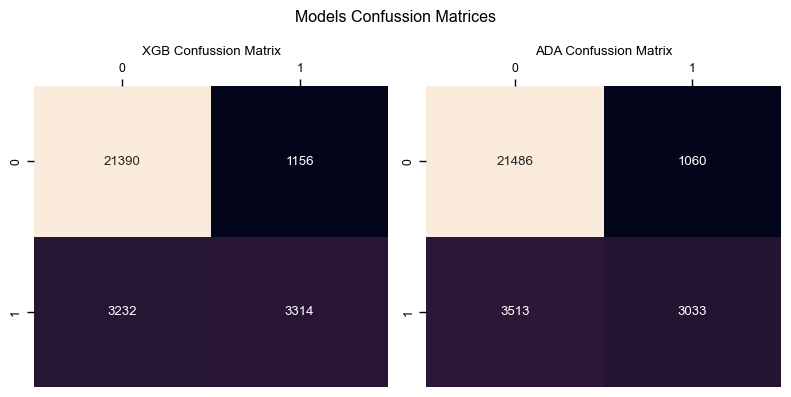

In [400]:
plt.figure(figsize=(8,4))
plt.suptitle('Models Confussion Matrices')
plt.subplot(1,2,1)
plt.title('XGB Confussion Matrix')
ax = sns.heatmap(cm_xgb, annot=True, fmt='g',cbar=None)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

plt.subplot(1,2,2)
plt.title('ADA Confussion Matrix')
ax = sns.heatmap(cm_ada, annot=True, fmt='g',cbar=None)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

plt.tight_layout()
plt.show()

From these results we can observe that both models perform well for the 'No Rain' class. But when it comes to the 'Rain' class (or positive), the performance is 50/50, where the true positives are the same as the false positives.

This is a consequence of the class imbalance that the dataset has, where the positive cases are much lower than the negative ones.

### Parting Comments

I am interested in getting further involved in data analytics and data science projects, be it in a position in industry or through further collaboration with energy professionals. 

**Contact:** scallerio@utexas.edu

[LinkedIn](https://www.linkedin.com/in/santiago-callerio/)



I hope this was helpful,

*Santiago Callerio*

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
